In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

In [40]:
df=pd.read_csv("titanic.csv")

In [41]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [42]:
df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [43]:
df=df.drop(df[['cabin','name','ticket']],axis=1)

In [44]:
df.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
survived      0
dtype: int64

In [45]:
df['age']=df.age.fillna(df.age.mean())
df['fare']=df.fare.fillna(df.fare.median())
df['embarked']=df.embarked.fillna(df.embarked.mode()[0])

In [46]:
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
 6   embarked  1309 non-null   object 
 7   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x28e77c94d30>,
 'caps': [<matplotlib.lines.Line2D at 0x28e75e8d430>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e77c94e50>],
 'medians': [<matplotlib.lines.Line2D at 0x28e75e709a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e77caf130>],
 'means': []}

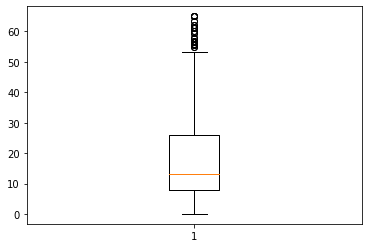

In [48]:
q1=df.fare.quantile(0.25)
q3=df.fare.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
df=df[(df.fare<=ul)&(df.fare>=ll)]
plt.boxplot(df.fare)

In [49]:
x=df.drop('survived',axis=1)
y=df['survived']
x=pd.get_dummies(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=20)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.83      0.79       142
           1       0.66      0.53      0.59        86

    accuracy                           0.72       228
   macro avg       0.70      0.68      0.69       228
weighted avg       0.71      0.72      0.71       228



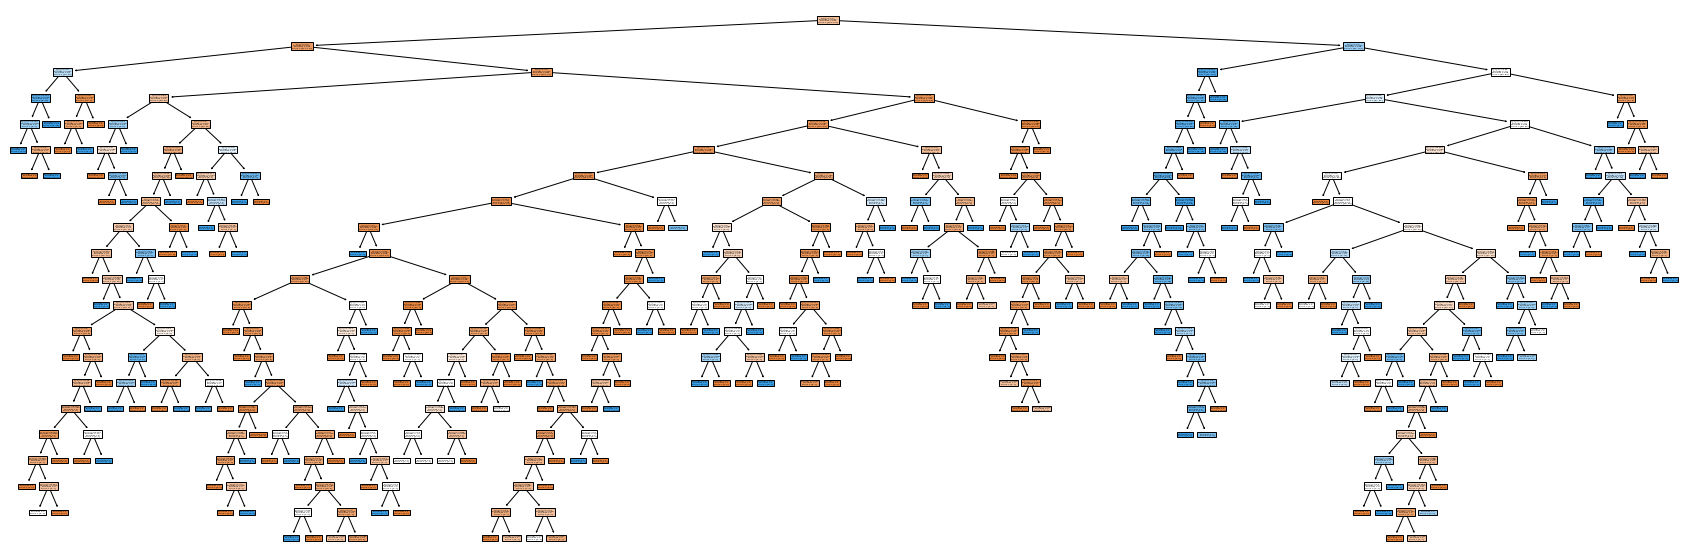

In [50]:
plt.figure(figsize=(30,10))
plot_tree(model,filled=True)
plt.show()

In [ ]:
# if linear & polynomial in offline then in online decision 6->linear 9->KNN/Tree vice versa